### AUTO INSURACE FRAUD CLASSIFIER
nsurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.the objective is to build a model that can predict the fraudulant claims from  the accumulated details like police_report_available	total_claim_amount	injury_claim	property_claim	vehicle_claims  etc.

### Importing the required liabraries and Loading DataSet

In [1]:
# importing librarires:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (1000, 40) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# checking for any highly correlated features in the dataset.
df_corr=df.corr()
df_corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


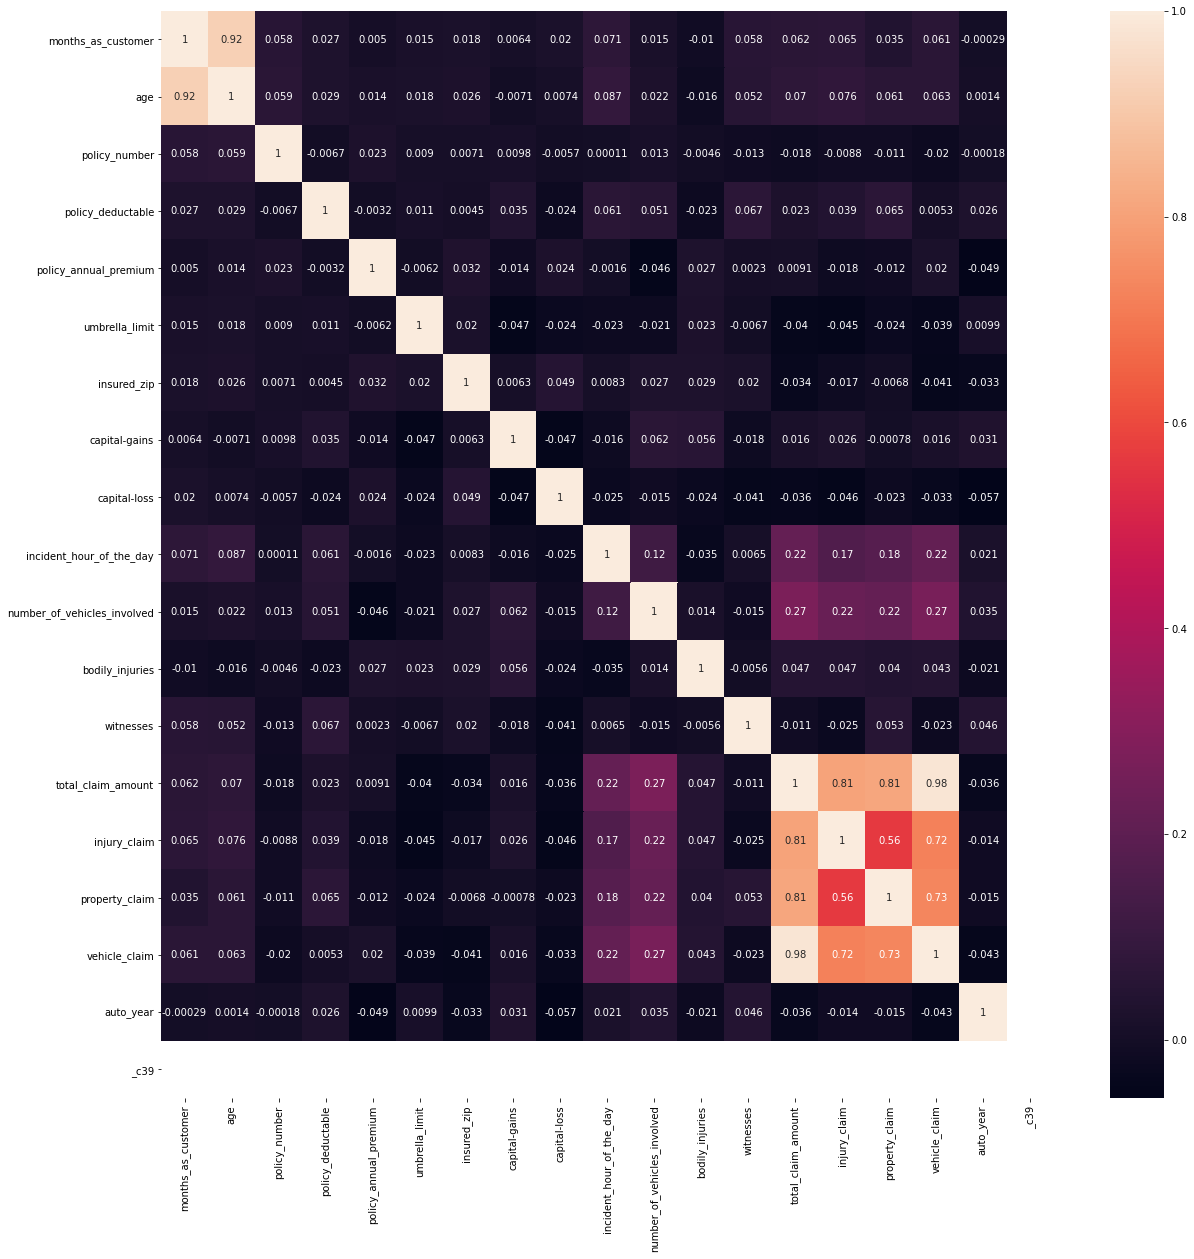

In [7]:
#VIsualisation
plt.figure(figsize=(20,20))
# plotting the correlation heatmap
sns.heatmap(df_corr,annot=True)
plt.show()

* There dataset is fo sizde (1000X 40)
* There are 39 features in total with no null values .
* There are some coreleations that will be clear on further analysis


In [11]:
#Listing categorcal or Numeric Coulumn 
cat_col,num_col=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 40
>>> Number of categorical features:: 21
>>> Number of Numerical Feature:: 19


In [9]:
df.fraud_reported.value_counts()/len(df)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [ ]:
# Alomost 5 percent claim is Fraud

In [10]:
df.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [13]:
# Removing the non -usefull columns.
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [14]:
not_need_col = ['policy_number','policy_csl','policy_bind_date','policy_state','insured_relationship','insured_hobbies','incident_date','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','_c39']

In [15]:
df_cleaned = df.drop(not_need_col,1)

In [16]:
df_cleaned.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,66000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [17]:
df_cleaned.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [18]:
#Listing categorcal or Numeric Coulumn 
cat_col,num_col=[],[]
for i in df_cleaned:
    if df_cleaned[i].dtype=='O':
        cat_col.append(i)
    elif (df_cleaned[i].dtypes=='int64') | (df_cleaned[i].dtypes=='float64') | (df_cleaned[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df_cleaned.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 26
>>> Number of categorical features:: 11
>>> Number of Numerical Feature:: 15


In [22]:
num_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [23]:
cat_col

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [19]:
df_cleaned.head(10)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,66000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,1000,1351.10,0,478456,FEMALE,PhD,tech-support,0,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,1000,1333.35,0,441716,MALE,PhD,prof-specialty,0,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,1000,1137.03,0,603195,MALE,Associate,tech-support,0,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,500,1442.99,0,601734,FEMALE,PhD,other-service,0,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,500,1315.68,0,600983,MALE,PhD,priv-house-serv,0,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [20]:
# Some missing data found , need to deal with it 
df_cleaned = df_cleaned.replace('?',np.nan)

In [21]:
df_cleaned.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
umbrella_limit               0
insured_zip                  0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

In [ ]:
# Mostly in 3 columns and afrounf 36 percent data 

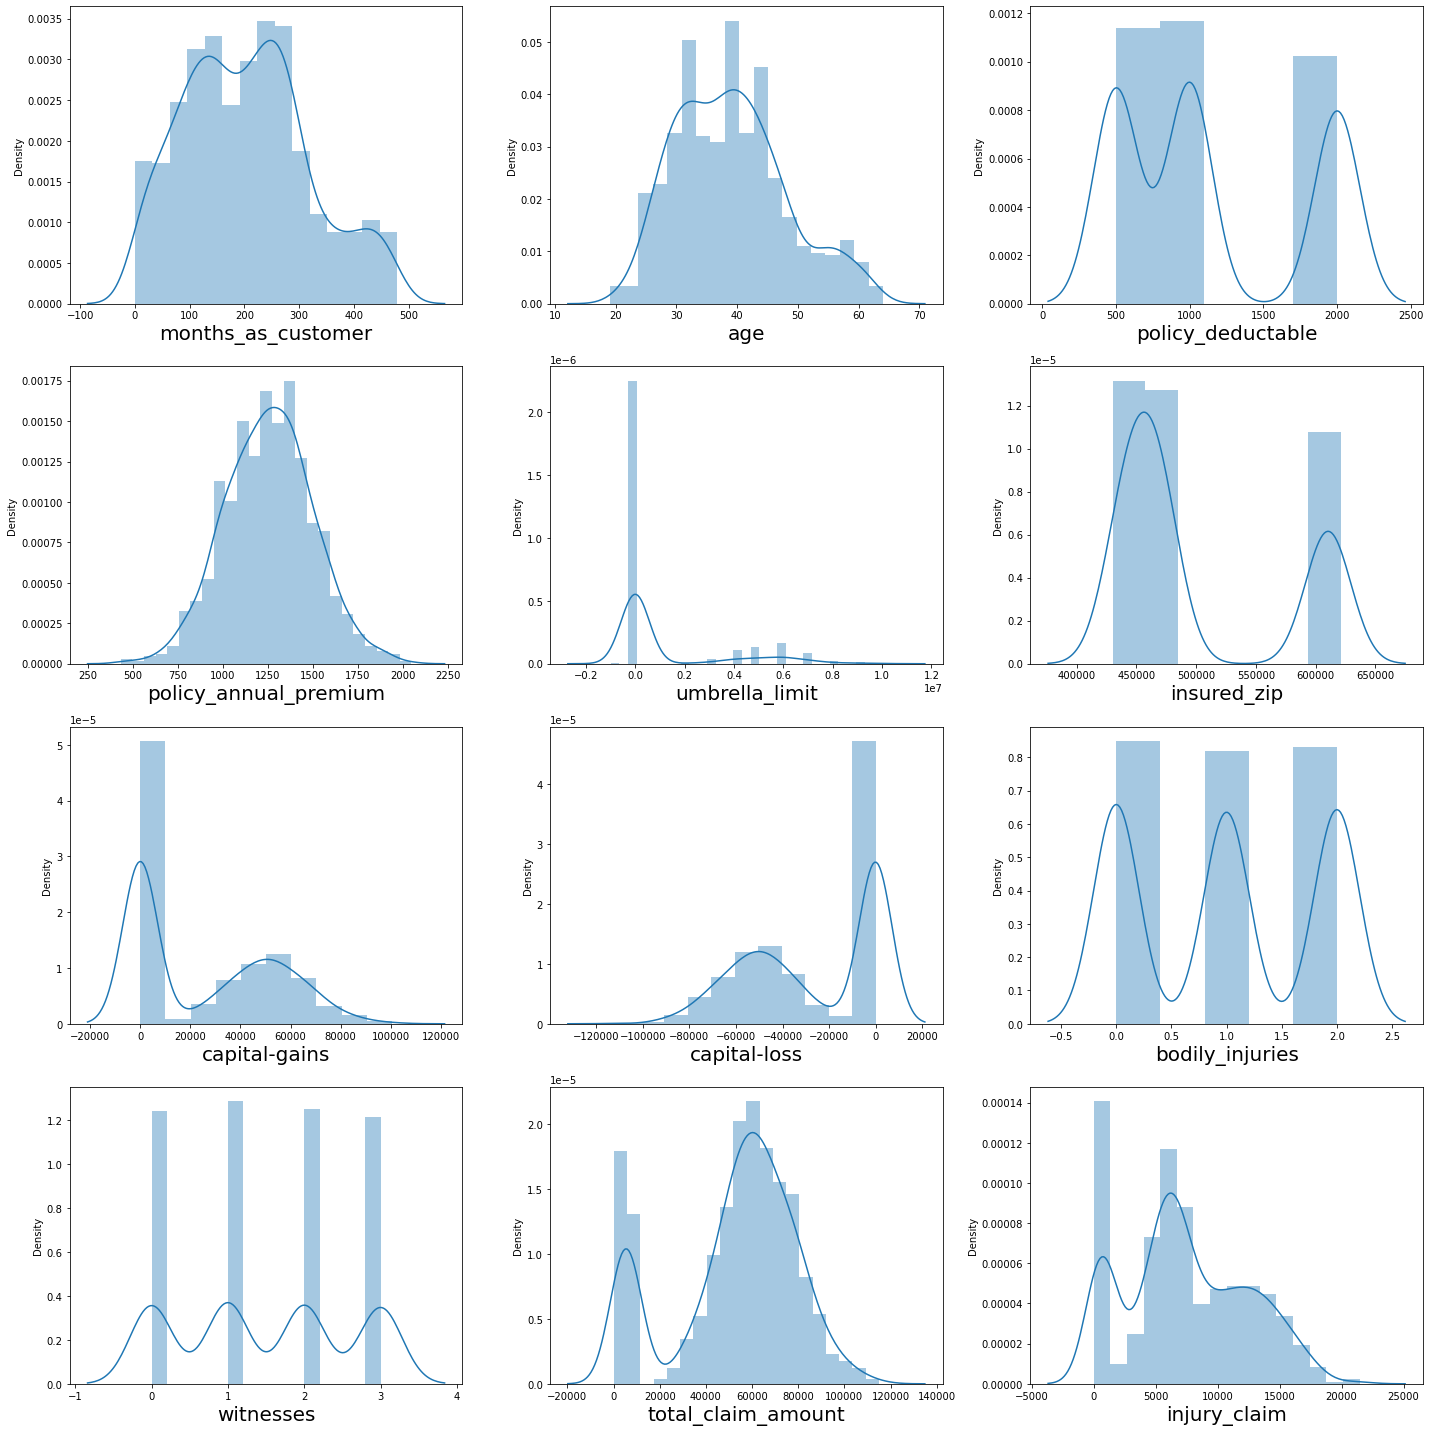

In [24]:
#Visualizartion
plt.figure(figsize =(20,25))
plt_num =4
for i in num_col:
    if plt_num<=15 :
        ax  =plt.subplot(5,3,plt_num)
        sns.distplot(df_cleaned[i])
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

### Univariate analysis.

In [25]:
df_cleaned.head()## policy deductable:


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,66000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

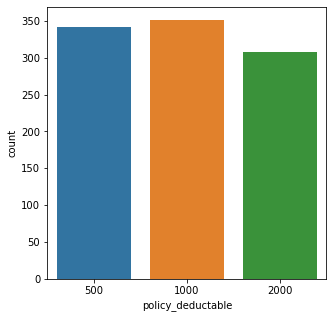

In [27]:
## policy deductable:
plt.figure(figsize =(5,5))
sns.countplot(df.policy_deductable)
df.policy_deductable.value_counts()

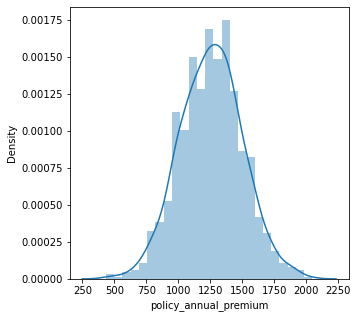

In [28]:
## annual policy premium
plt.figure(figsize =(5,5))
sns.distplot(df.policy_annual_premium)
plt.show()

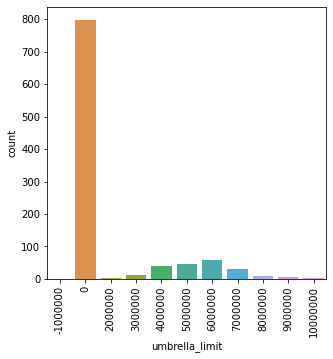

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [30]:
# ubmeralla limit
plt.figure(figsize =(5,5))
sns.countplot(df_cleaned.umbrella_limit)
plt.xticks(rotation='90')
plt.show()
df_cleaned.umbrella_limit.value_counts()

In [31]:
df_cleaned.umbrella_limit.value_counts()/len(df) * 100

 0           79.8
 6000000      5.7
 5000000      4.6
 4000000      3.9
 7000000      2.9
 3000000      1.2
 8000000      0.8
 9000000      0.5
 2000000      0.3
 10000000     0.2
-1000000      0.1
Name: umbrella_limit, dtype: float64

In [ ]:
# We have either missing data or heavily skewed coulumns , its better to drop this column

In [32]:
df_cleaned.drop('umbrella_limit',1,inplace=True)

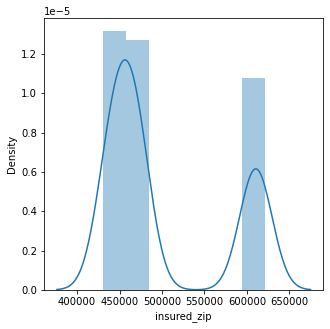

In [34]:
## insured zip 
plt.figure(figsize =(5,5))
sns.distplot(df.insured_zip)
plt.show()

In [ ]:
# Since we can see that the data is basically bifucated into 2 slots , we can devide the datse into 2 subset on either side of 500K

In [35]:
df_cleaned.insured_zip = df_cleaned.insured_zip.apply(lambda x: 1 if x > 500000 else 0)
df_cleaned.rename(columns={'insured_zip':'insured_zip_above_5L'},inplace=True)

In [37]:
df_cleaned.sample(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
528,379,54,500,1251.16,0,FEMALE,Associate,machine-op-inspct,41400,0,...,1,NO,75960,6330,6330,63300,Jeep,Grand Cherokee,2010,N
897,178,39,500,1035.99,0,FEMALE,JD,exec-managerial,0,0,...,0,NaN,64680,11760,11760,41160,Jeep,Wrangler,2010,N
191,252,39,1000,1086.21,0,MALE,JD,farming-fishing,68500,-57500,...,2,NaN,50490,5610,5610,39270,Nissan,Maxima,2001,N
606,110,27,1000,1664.66,0,FEMALE,Associate,priv-house-serv,0,-66200,...,3,NaN,57500,5750,5750,46000,Audi,A3,2010,N
901,5,21,500,915.41,1,FEMALE,High School,exec-managerial,0,0,...,0,NO,40500,4050,4050,32400,Nissan,Pathfinder,1998,N


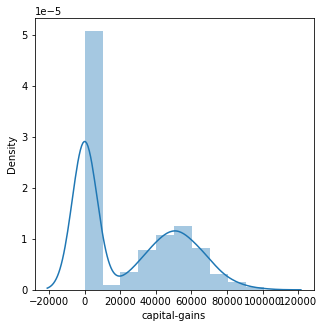

In [39]:
## capital gains and capital loss
plt.figure(figsize =(5,5))
sns.distplot(df['capital-gains'])
plt.show()

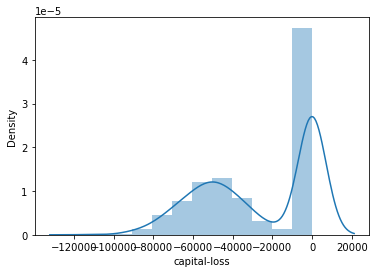

In [41]:
sns.distplot(df['capital-loss'])
plt.show()

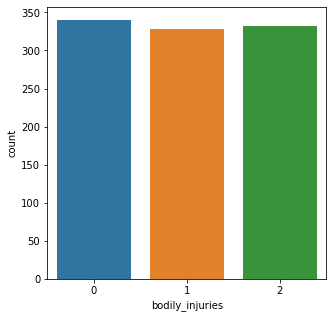

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

In [43]:
# bodily injuries.

plt.figure(figsize =(5,5))
sns.countplot(df.bodily_injuries)
plt.show()
df.bodily_injuries.value_counts()

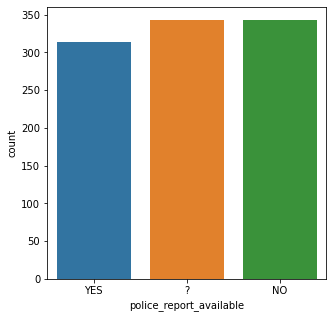

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [44]:
# police report available
# Contains Missing values as seen earlier
plt.figure(figsize =(5,5))
sns.countplot(df.police_report_available)
plt.show()
df.police_report_available.value_counts()

In [47]:
cat_col

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

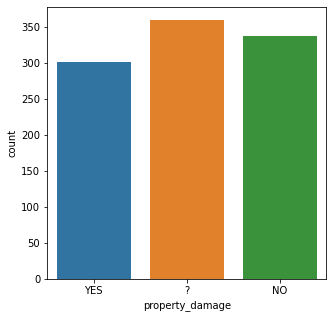

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [48]:
## property damage.
plt.figure(figsize =(5,5))
sns.countplot(df.property_damage)
plt.show()
df.property_damage.value_counts()

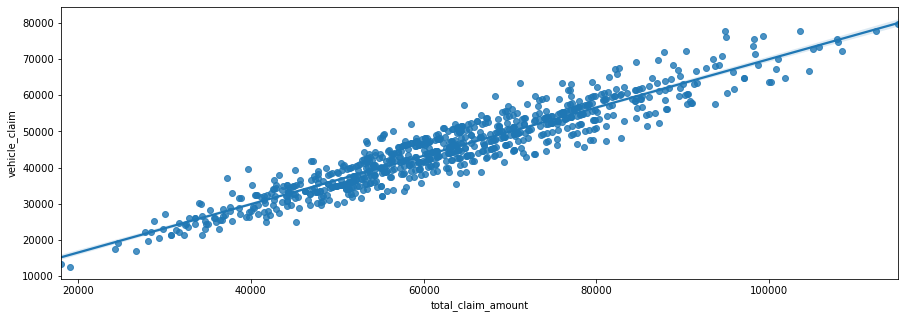

In [56]:
plt.figure(figsize =(15,5))
sns.regplot('total_claim_amount','vehicle_claim',data=df_cleaned.dropna())
plt.show()
df_cleaned.drop(['property_damage','police_report_available'],1,inplace=True)

In [58]:
df_cleaned.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,53300,0,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,0,MALE,MD,machine-op-inspct,0,0,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,0,FEMALE,PhD,sales,35100,0,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,1,FEMALE,PhD,armed-forces,48900,-62400,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,1,MALE,Associate,sales,66000,-46000,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N


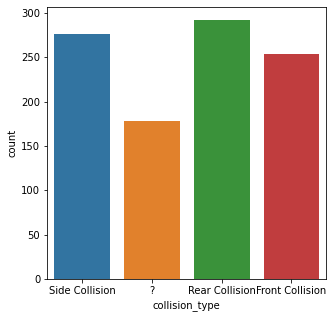

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [59]:
#collision_type
plt.figure(figsize =(5,5))
sns.countplot(df.collision_type)
plt.show()
df.collision_typedf.collision_type.value_counts()

In [61]:
# Imputing as Missing 
df.collision_type = df.collision_type.replace('?','Missing')

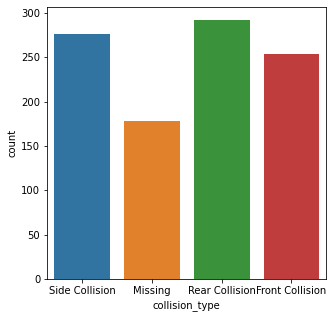

Rear Collision     292
Side Collision     276
Front Collision    254
Missing            178
Name: collision_type, dtype: int64

In [63]:
#collision_type
plt.figure(figsize =(5,5))
sns.countplot(df.collision_type)
plt.show()
df.collision_type.value_counts()

In [ ]:
## Outlier Removal

In [65]:
#Listing categorcal or Numeric Coulumn for df_cleaned
cat_col,num_col=[],[]
for i in df_cleaned:
    if df_cleaned[i].dtype=='O':
        cat_col.append(i)
    elif (df_cleaned[i].dtypes=='int64') | (df_cleaned[i].dtypes=='float64') | (df_cleaned[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df_cleaned.shape[1])


>>> Total Number of Feature:: 23


In [66]:
num_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip_above_5L',
 'capital-gains',
 'capital-loss',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [68]:
cat_col

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [67]:
#Applying ZSCORE in num col
z_scores = stats.zscore(df_cleaned[num_col])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [69]:
len(df) -len(df_cleaned)

5

In [70]:
## skewness
df_cleaned.skew()

months_as_customer       0.358958
age                      0.473974
policy_deductable        0.475849
policy_annual_premium    0.033107
insured_zip_above_5L     0.913845
capital-gains            0.479472
capital-loss            -0.379708
bodily_injuries          0.012979
witnesses                0.027371
total_claim_amount      -0.591848
injury_claim             0.270253
property_claim           0.359528
vehicle_claim           -0.618189
auto_year               -0.049758
dtype: float64

* Data Omitted 5 rows
* Skewness withiin permissable limit 

In [71]:
# ENCODING 
from sklearn.preprocessing import LabelEncoder
lab_enc =LabelEncoder()

In [72]:
for i in cat_col:
    df_cleaned[i]=lab_enc.fit_transform(df_cleaned[i])

In [73]:
# Standard Scaling using Cloumns Transformer 

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [76]:
cotrn = ColumnTransformer(transformers=[('scalar',StandardScaler(),num_col)],remainder='passthrough')

In [77]:
df_cleaned = cotrn.fit_transform(df_cleaned)

In [78]:
df_cleaned = pd.DataFrame(df_cleaned)

In [79]:
df_cleaned

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.073984,0.986592,-0.223417,0.621478,-0.642925,1.013699,0.954606,0.008593,0.468407,0.716696,...,-0.184194,1.0,4.0,2.0,2.0,2.0,0.0,10.0,1.0,1.0
1,0.204584,0.330183,1.411141,-0.250891,-0.642925,-0.900320,0.954606,-1.212826,-1.334551,-1.807055,...,0.315188,1.0,4.0,6.0,3.0,3.0,1.0,8.0,12.0,1.0
2,-0.612651,-1.092035,1.411141,0.647396,-0.642925,0.360132,0.954606,1.230012,1.369886,-0.685135,...,0.315188,0.0,6.0,11.0,0.0,1.0,1.0,4.0,30.0,0.0
3,0.448016,0.220782,1.411141,0.658213,1.555392,0.855694,-1.277433,0.008593,0.468407,0.405305,...,1.480413,0.0,6.0,1.0,2.0,0.0,0.0,3.0,34.0,1.0
4,0.204584,0.548986,-0.223417,1.357847,1.555392,1.469760,-0.690808,-1.212826,-0.433072,-1.752817,...,0.648109,1.0,0.0,11.0,3.0,3.0,1.0,0.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,-0.223417,0.221633,-0.642925,-0.900320,0.954606,-1.212826,-0.433072,1.307999,...,0.148727,0.0,5.0,2.0,2.0,0.0,1.0,6.0,6.0,0.0
991,0.700142,0.220782,-0.223417,0.745787,1.555392,1.645720,0.954606,1.230012,1.369886,2.115114,...,1.646873,0.0,6.0,9.0,2.0,1.0,0.0,13.0,28.0,0.0
992,-0.647427,-0.545028,-1.040696,0.524044,-0.642925,0.360132,0.954606,1.230012,1.369886,0.560811,...,-1.515880,0.0,5.0,1.0,0.0,2.0,1.0,11.0,19.0,0.0
993,2.204203,2.518212,1.411141,0.413506,-0.642925,-0.900320,0.954606,-1.212826,-0.433072,-0.217478,...,-1.182958,1.0,0.0,5.0,2.0,1.0,0.0,1.0,5.0,0.0


In [81]:
#Train and TRAIN_TEST split
from sklearn.model_selection import train_test_split

In [82]:
# X and y split
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

## Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [83]:
# checking the shape
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (666, 22)
YTRAIN 
 (666,)
XTEST 
 (329, 22)
YTRAIN 
 (329,)


### Model Building  

In [86]:
#imposting Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [87]:
#reusable Function 
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [88]:
# Model1 : Logistic Regression
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8033033033033034
Test_Acc: 0.7537993920972644
Recall: 0.7537993920972644
Precision: 0.7537993920972644
F1: 0.7537993920972644


In [89]:
#Model2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.7567567567567568
Test_Acc: 0.7446808510638298
Recall: 0.7446808510638298
Precision: 0.7446808510638298
F1: 0.7446808510638298


In [90]:
#Model3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.7972972972972973
Test_Acc: 0.7142857142857143
Recall: 0.7142857142857143
Precision: 0.7142857142857143
F1: 0.7142857142857143


In [91]:
#Model4: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.7355623100303952
Recall: 0.7355623100303952
Precision: 0.7355623100303952
F1: 0.7355623100303952


In [92]:
#Model5: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.7659574468085106
Recall: 0.7659574468085106
Precision: 0.7659574468085106
F1: 0.7659574468085106


In [94]:
#Best MOdel

models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200)]
model_names = 'Logistic_reg SVC KNN Decision_Tree Random_forest '.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Model_name':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Decision_Tree
Random_forest


In [98]:
models_df

,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV,Model_name
0,0.803303,0.753799,0.753799,0.753799,0.753799,0.770329,Logistic_reg
1,0.756757,0.744681,0.744681,0.744681,0.744681,0.756761,SVC
2,0.797297,0.714286,0.714286,0.714286,0.714286,0.705690,KNN
3,1.000000,0.735562,0.735562,0.735562,0.735562,0.702671,Decision_Tree
4,1.000000,0.762918,0.762918,0.762918,0.762918,0.779284,Random_forest


### BEST MODEL after considering Cross Validation will be Logistic Regression as the difference for it model is lower amongst all

In [99]:
### HyperParaneter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
parameters ={'n_jobs':[1,'None'],
            'class_weight':['dict','balanced']}

In [112]:
GSV = GridSearchCV(LogisticRegression(),parameters,cv=2)
GSV.fit(X_train,y_train)


GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'n_jobs': [1, 'None']})

### BEST PARAMS 

In [113]:
GSV.best_params_

{'class_weight': 'dict', 'n_jobs': 1}

In [ ]:
## RESEDIGING THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [101]:
best_model = LogisticRegression(class_weight= 'dict', n_jobs=1)
best_model.fit(X_train,y_train)

LogisticRegression(class_weight='dict', n_jobs=1)

In [102]:
y_preds = best_model.predict(X_test)

In [103]:
train_n_ret_scores(LogisticRegression(class_weight= 'dict', n_jobs=1))

Train_Acc: 0.8033033033033034
Test_Acc: 0.7537993920972644
Recall: 0.7537993920972644
Precision: 0.7537993920972644
F1: 0.7537993920972644


In [104]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       245
         1.0       0.53      0.29      0.37        84

    accuracy                           0.75       329
   macro avg       0.66      0.60      0.61       329
weighted avg       0.72      0.75      0.73       329



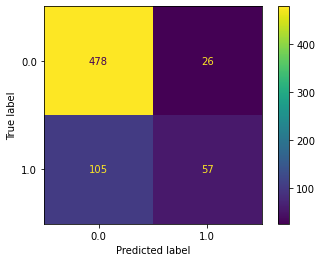

In [105]:
plot_confusion_matrix(best_model,X_train,y_train)

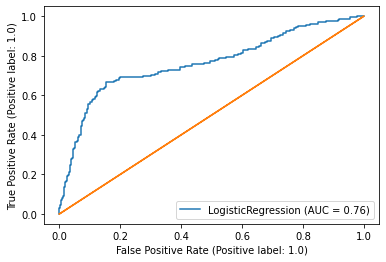

In [109]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)
plt.show()

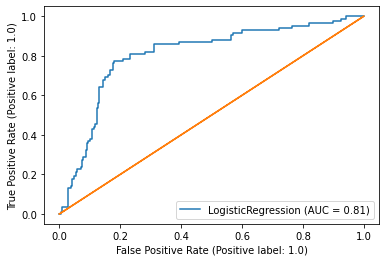

In [110]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)
plt.show()

### Saving Model

In [111]:
#Saving Model 
import joblib
joblib.dump(best_model,'Auto_Ins_fraud.pk1')


['Auto_Ins_fraud.pk1']